### Latar Belakang Dataset: Individual Household Electric Power Consumption

Dataset "Individual Household Electric Power Consumption" berisi 2,075,259 pengukuran yang dikumpulkan dalam sebuah rumah di Sceaux, Prancis, selama periode Desember 2006 hingga November 2010 (47 bulan). Data ini menyediakan informasi terperinci tentang konsumsi listrik pada tingkat menit, dengan fokus utama pada prediksi "Global Active Power" sebagai target utama.

#### 1. Tujuan Analisis:
   - Tujuan utama dari penggunaan Artificial Neural Network (ANN) untuk regresi pada dataset ini adalah memprediksi Global Active Power berdasarkan informasi yang diberikan oleh fitur-fitur terkait konsumsi listrik.

#### 2. Waktu dan Variabilitas Data:
   - Rentang waktu dataset mencakup empat tahun, memungkinkan pemodelan untuk menangkap pola dan variasi konsumsi listrik selama periode tersebut. Dengan data tingkat menit, model dapat membantu mengidentifikasi tren harian, musiman, atau perubahan jangka panjang.

#### 3. Data Multivariat:
   - Dataset ini mencakup berbagai variabel seperti global_active_power, global_reactive_power, voltage, global_intensity, dan tiga sub-metering yang memberikan informasi tentang konsumsi listrik pada perangkat tertentu di rumah tangga.

#### 4. Fokus pada Perangkat Elektrik Tertentu:
   - Sub-metering 1, 2, dan 3 memberikan wawasan khusus tentang konsumsi listrik di area dapur, ruang cuci, dan perangkat seperti pemanas air listrik. Informasi ini dapat mendukung pemahaman tentang pola penggunaan daya pada perangkat tertentu.

#### 5. Peningkatan Efisiensi Energi:
   - Penggunaan model ANN untuk regresi pada dataset ini diharapkan dapat memberikan pandangan yang lebih baik tentang bagaimana meningkatkan efisiensi energi di rumah tangga. Ini dapat membantu dalam pengembangan solusi energi yang lebih berkelanjutan.

#### 6. Tantangan Data Hilang:
   - Dataset ini memiliki sekitar 1,25% data yang hilang. Oleh karena itu, penanganan data hilang perlu dipertimbangkan sebelum menerapkan model ANN.

Pemahaman mendalam tentang konsumsi listrik rumah tangga melalui model ANN regresi dapat memberikan manfaat signifikan dalam pengelolaan energi, perencanaan sumber daya, dan pengembangan kebijakan untuk mendukung penggunaan energi yang lebih efisien dan berkelanjutan.

In [ ]:
import gdown
import pandas as pd
def import_from_gdrive(id_file, file_name):
  link = 'https://drive.google.com/uc?id=' + id_file
  output_file = '/content/' + file_name
  gdown.download(link, output_file, quiet=False)
  data = pd.read_csv(file_name)
  return data

In [ ]:
link_data = '1gKwa93ceyyOJ-vLN4-hPJAhPElyqRUpj'
data = import_from_gdrive(link_data,'household_power_consumption.txt')

Downloading...
From: https://drive.google.com/uc?id=1gKwa93ceyyOJ-vLN4-hPJAhPElyqRUpj
To: /content/household_power_consumption.txt
100%|██████████| 133M/133M [00:03<00:00, 33.9MB/s]


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import seaborn as sns

Data Preprocessing

In [ ]:
# Load dataset
data = pd.read_csv('household_power_consumption.txt',sep=';', parse_dates={'date_time':['Date','Time']},
                infer_datetime_format=True,
                low_memory=False, na_values=['nan','?'],
                index_col='date_time')

In [ ]:
data.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [ ]:
data.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [ ]:
data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0


In [ ]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [ ]:
data.tail()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2010-11-26 20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.0,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2010-11-26 21:01:00,0.934,0.0,239.70,3.8,0.0,0.0,0.0
2010-11-26 21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


In [ ]:
data.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


Melakukan pengecekan nilai null yang ada pada dataframe kombinasi

In [ ]:
def checkNull(null_count):
  plt.figure(figsize=(8, 5))
  null_counts.plot(kind='bar', color='red')
  plt.title('Jumlah Nilai Null per Kolom')
  plt.xlabel('Kolom')
  plt.ylabel('Jumlah Null')
  plt.show()

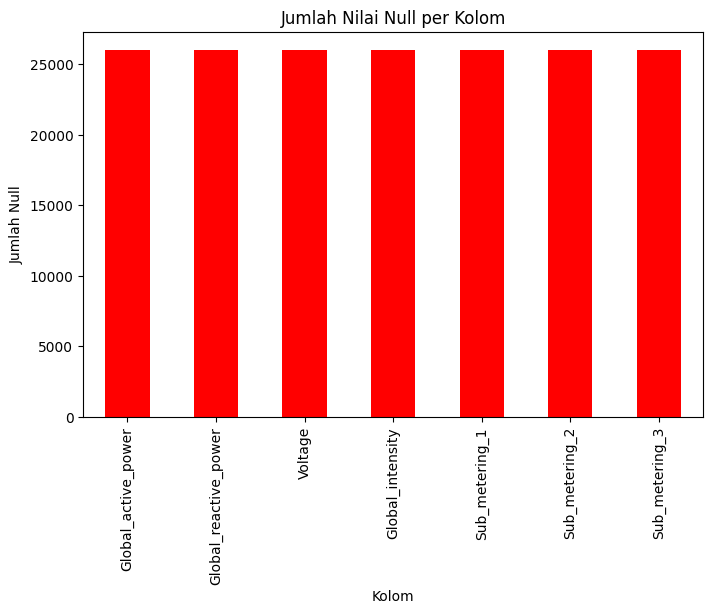

In [ ]:
null_counts = data.isnull().sum()
checkNull(null_counts)

Melakukan drop untuk nilai yang tidak diketahui seperti na dan null pada kolom

In [ ]:
data.dropna(axis=0, inplace=True)

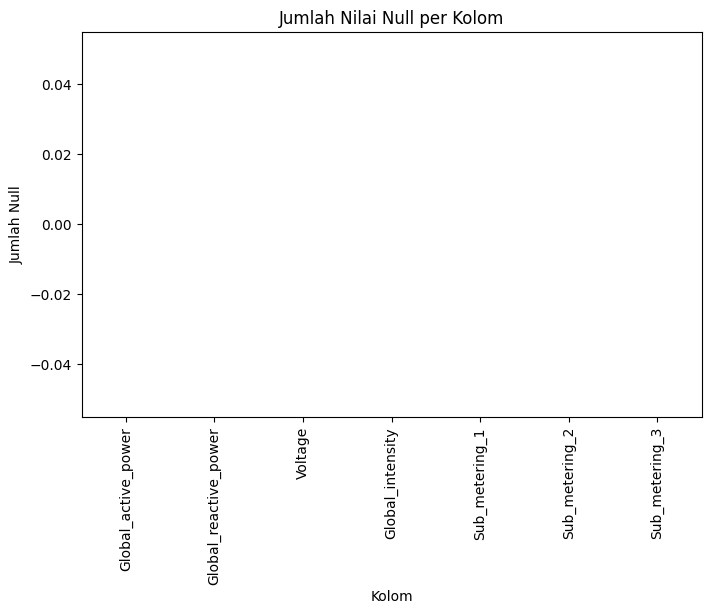

In [ ]:
# Menghitung jumlah nilai-nilai yang hilang dalam data
null_counts = data.isnull().sum()

# Memanggil fungsi checkNull yang sepertinya digunakan untuk memeriksa nilai-nilai yang hilang
checkNull(null_counts)

In [ ]:
data.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

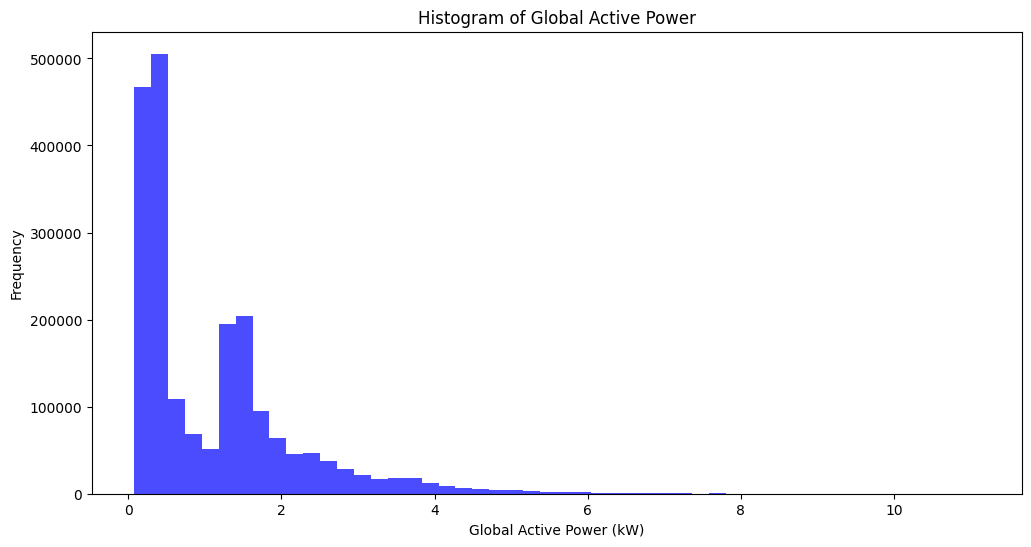

In [ ]:
# Histogram global_active_power
plt.figure(figsize=(12, 6))
plt.hist(data['Global_active_power'], bins=50, color='blue', alpha=0.7)
plt.xlabel('Global Active Power (kW)')
plt.ylabel('Frequency')
plt.title('Histogram of Global Active Power')
plt.show()

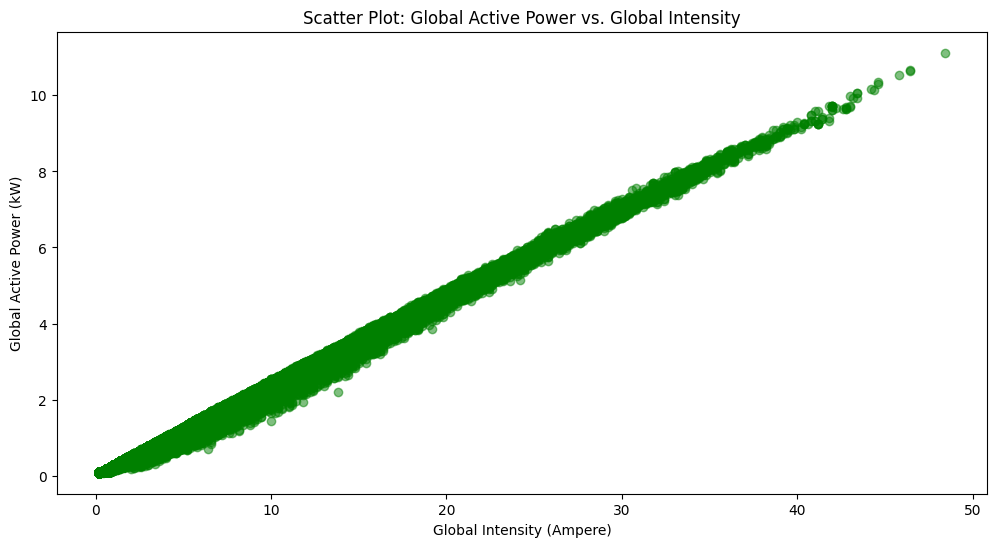

In [ ]:
# Scatter plot global_active_power vs global_intensity
plt.figure(figsize=(12, 6))
plt.scatter(data['Global_intensity'], data['Global_active_power'], color='green', alpha=0.5)
plt.xlabel('Global Intensity (Ampere)')
plt.ylabel('Global Active Power (kW)')
plt.title('Scatter Plot: Global Active Power vs. Global Intensity')
plt.show()

Pemilihan fitur dan target

In [ ]:
X = data[['Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]
y = data['Global_active_power']

Bagi data menjadi data latih dan data uji

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

Normalisasi input

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Normalisasi output

In [ ]:
scalerOutput = StandardScaler()
y_train = scalerOutput.fit_transform(y_train)
y_test = scalerOutput.transform(y_test)

<Axes: >

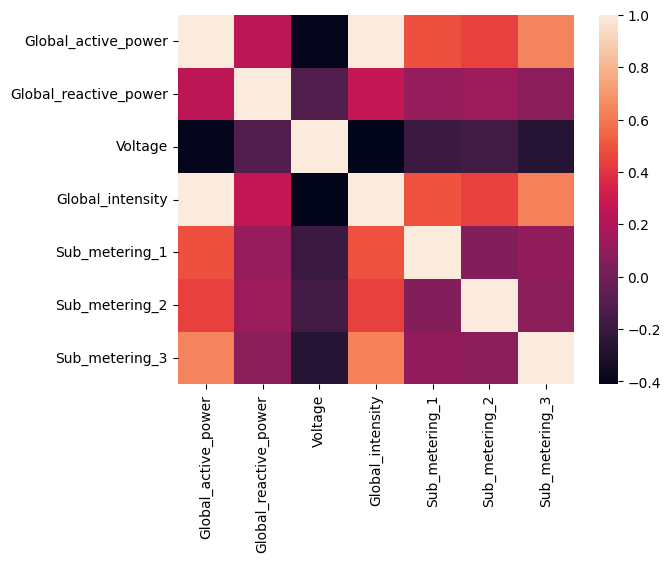

In [ ]:
corr = data.corr()
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns)

#### Ringkasan Metode

### Ringkasan Model:

#### Model 1:
- **Arsitektur:**
  - Input Layer (Berdasarkan jumlah fitur pada data)
  - Dense Layer dengan 128 unit dan fungsi aktivasi ReLU
  - Dense Layer dengan 64 unit dan fungsi aktivasi ReLU
  - Output Layer dengan 1 unit (regresi karena tidak ada fungsi aktivasi pada output layer)

#### Model 2:
- **Arsitektur:**
  - Input Layer (Berdasarkan jumlah fitur pada data)
  - Dense Layer dengan 128 unit dan fungsi aktivasi ReLU
  - Dropout Layer dengan tingkat dropout 0.2
  - Dense Layer dengan 64 unit dan fungsi aktivasi ReLU
  - Dropout Layer dengan tingkat dropout 0.2
  - Output Layer dengan 1 unit (regresi karena tidak ada fungsi aktivasi pada output layer)

#### Model 3:
- **Arsitektur:**
  - Input Layer (Berdasarkan jumlah fitur pada data)
  - Dense Layer dengan 256 unit dan fungsi aktivasi ReLU
  - Dense Layer dengan 128 unit dan fungsi aktivasi ReLU
  - Dense Layer dengan 64 unit dan fungsi aktivasi ReLU
  - Output Layer dengan 1 unit (regresi karena tidak ada fungsi aktivasi pada output layer)


1.   Langkah 1: Membuat tiga model ANN dengan arsitektur yang berbeda. Arsitektur model ANN terdiri dari lapisan-lapisan neuron. Setiap lapisan neuron memiliki fungsi aktivasi yang berbeda. Fungsi aktivasi ini menentukan bagaimana neuron-neuron di lapisan tersebut akan memproses input. Dalam hal ini, kita menggunakan fungsi aktivasi Relu untuk semua lapisan kecuali lapisan terakhir. Lapisan terakhir menggunakan fungsi aktivasi linier karena kita ingin model memprediksi nilai numerik.
2.   Langkah 2: Kompilasi ketiga model dengan optimizer='adam', loss='mse'. Optimizer adalah algoritma yang digunakan untuk memperbarui parameter model selama proses pelatihan. Loss adalah fungsi yang digunakan untuk mengukur kesalahan model pada data latih. Dalam hal ini, kita menggunakan optimizer Adam dan loss MSE (Mean Squared Error).
3. Langkah 3: Latih ketiga model pada data latih (X_train, y_train). Proses pelatihan melibatkan pemberian data latih ke model dan membiarkan model mempelajari pola data tersebut. Model akan terus diperbarui hingga kesalahan model pada data latih sudah minimal.
4. Langkah 4: Evaluasi ketiga model pada data uji (X_test, y_test). Proses evaluasi melibatkan pemberian data uji ke model dan mengukur kesalahan model pada data uji. Kesalahan pada data uji dapat digunakan untuk membandingkan kinerja ketiga model.







Pembangunan Model Baseline

In [ ]:
# Model 1: Model dengan tiga lapisan Dense tanpa dropout
model1 = keras.Sequential([
    keras.layers.Input(shape=(len(X.columns),)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1),  # Lapisan output
])

# Model 2: Model dengan dropout layers untuk menghindari overfitting
model2 = keras.Sequential([
    keras.layers.Input(shape=(len(X.columns),)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),  # Dropout layer
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),  # Dropout layer
    keras.layers.Dense(1),  # Lapisan output
])

# Model 3: Model dengan lebih banyak lapisan Dense
model3 = keras.Sequential([
    keras.layers.Input(shape=(len(X.columns),)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1),  # Lapisan output
])

Berikut gambaran model model yang telah kami rancang

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               896       
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9217 (36.00 KB)
Trainable params: 9217 (36.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               896       
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9217 (36.00 KB)
Trainable params: 9217 (36.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               1792      
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 43009 (168.00 KB)
Trainable params: 43009 (168.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Melakukan compile model yang telah dirancang dengan optimizer adam, dan loss mean squared error

In [ ]:
# Kompilasi model
model1.compile(optimizer='adam', loss='mean_squared_error')
model2.compile(optimizer='adam', loss='mean_squared_error')
model3.compile(optimizer='adam', loss='mean_squared_error')

Melakukan pelatihan terhadap model dengan X_train sebagai input dan y_train sebagai output dengan epochnya 100 dan batch_sizenya 16384

In [ ]:
# Pelatihan model 1
history1 = model1.fit(X_train, y_train, epochs=100, batch_size=16384, validation_data=(X_test, y_test))

Epoch 1/100
101/101 [==============================] - 6s 55ms/step - loss: 0.0903 - val_loss: 0.0027
Epoch 2/100
101/101 [==============================] - 8s 81ms/step - loss: 0.0020 - val_loss: 0.0016
Epoch 3/100
101/101 [==============================] - 7s 67ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 4/100
101/101 [==============================] - 8s 82ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 5/100
101/101 [==============================] - 7s 65ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 6/100
101/101 [==============================] - 5s 45ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 7/100
101/101 [==============================] - 5s 53ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 8/100
101/101 [==============================] - 4s 35ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 9/100
101/101 [==============================] - 3s 35ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 10/100
101/101 [==============================] - 5s 48ms/step - loss: 0.001

In [ ]:
# Pelatihan model 2
history2 = model2.fit(X_train, y_train, epochs=100, batch_size=16384, validation_data=(X_test, y_test))

Epoch 1/100
101/101 [==============================] - 12s 113ms/step - loss: 0.1134 - val_loss: 0.0034
Epoch 2/100
101/101 [==============================] - 8s 75ms/step - loss: 0.0302 - val_loss: 0.0041
Epoch 3/100
101/101 [==============================] - 10s 99ms/step - loss: 0.0227 - val_loss: 0.0039
Epoch 4/100
101/101 [==============================] - 7s 70ms/step - loss: 0.0192 - val_loss: 0.0045
Epoch 5/100
101/101 [==============================] - 8s 82ms/step - loss: 0.0172 - val_loss: 0.0030
Epoch 6/100
101/101 [==============================] - 7s 68ms/step - loss: 0.0161 - val_loss: 0.0045
Epoch 7/100
101/101 [==============================] - 9s 85ms/step - loss: 0.0155 - val_loss: 0.0039
Epoch 8/100
101/101 [==============================] - 7s 64ms/step - loss: 0.0148 - val_loss: 0.0038
Epoch 9/100
101/101 [==============================] - 8s 84ms/step - loss: 0.0144 - val_loss: 0.0025
Epoch 10/100
101/101 [==============================] - 6s 63ms/step - loss: 0.

In [ ]:
# Pelatihan model 3
history3 = model3.fit(X_train, y_train, epochs=100, batch_size=16384, validation_data=(X_test, y_test))

Epoch 1/100
101/101 [==============================] - 14s 129ms/step - loss: 0.0411 - val_loss: 0.0014
Epoch 2/100
101/101 [==============================] - 12s 114ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 3/100
101/101 [==============================] - 13s 128ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 4/100
101/101 [==============================] - 13s 127ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 5/100
101/101 [==============================] - 13s 132ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 6/100
101/101 [==============================] - 13s 130ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 7/100
101/101 [==============================] - 14s 138ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 8/100
101/101 [==============================] - 13s 126ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 9/100
101/101 [==============================] - 11s 108ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 10/100
101/101 [==============================] - 14s 134m

Membuat sebuah fungsi untuk menampilkan loss dan scatter plot prediksi

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model 1 Loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper right')
  plt.show()

def scatter_plot(y_test, predictionModel):
  plt.figure(figsize=(8, 8))
  plt.scatter(y_test, predictionModel, alpha=0.5)
  plt.xlabel('True Values (Global Active Power)')
  plt.ylabel('Predicted Values (Global Active Power)')
  plt.title('Scatter Plot: True vs. Predicted Values')
  plt.show()

Melakuan evaluasi terhadap model yang telah dilatih menggunakan X_test dan y_test

In [ ]:
# Evaluate Untuk Menghitung MSE
evaluatedModel1 = model1.evaluate(X_test, y_test)
evaluatedModel2= model2.evaluate(X_test, y_test)
evaluatedModel3= model3.evaluate(X_test, y_test)

12808/12808 [==============================] - 23s 2ms/step - loss: 8.8085e-04


Melakukan prediksi terhadap model yang telah dilatih menggunakan X_test

In [ ]:
predictionModel1 = model1.predict(X_test)
predictionModel2 = model2.predict(X_test)
predictionModel3 = model3.predict(X_test)

12808/12808 [==============================] - 22s 2ms/step


Melakukan denormalisasi y test dan y prediksi yang telah didapatkan

In [ ]:
y_test_denormalized = scalerOutput.inverse_transform(y_test)

In [ ]:
y_test_denormalized

array([[1.502],
       [0.374],
       [0.62 ],
       ...,
       [0.268],
       [2.536],
       [2.18 ]])

In [ ]:
prediction_model_1_denormalized = scalerOutput.inverse_transform(predictionModel1)
prediction_model_2_denormalized = scalerOutput.inverse_transform(predictionModel2)
prediction_model_3_denormalized = scalerOutput.inverse_transform(predictionModel3)

In [ ]:
prediction_model_1_denormalized

array([[1.5420609 ],
       [0.37389892],
       [0.644778  ],
       ...,
       [0.23577613],
       [2.4973755 ],
       [2.1525228 ]], dtype=float32)

In [ ]:
prediction_model_2_denormalized

array([[1.5327168 ],
       [0.39160407],
       [0.658012  ],
       ...,
       [0.26628417],
       [2.4233787 ],
       [2.100451  ]], dtype=float32)

In [ ]:
prediction_model_3_denormalized

array([[1.5410465 ],
       [0.37737894],
       [0.64720577],
       ...,
       [0.23931557],
       [2.5011528 ],
       [2.1663    ]], dtype=float32)

Menampilkan Loss dan val_loss kedalam sebuah grafik dari ke tiga model yang telah di latih

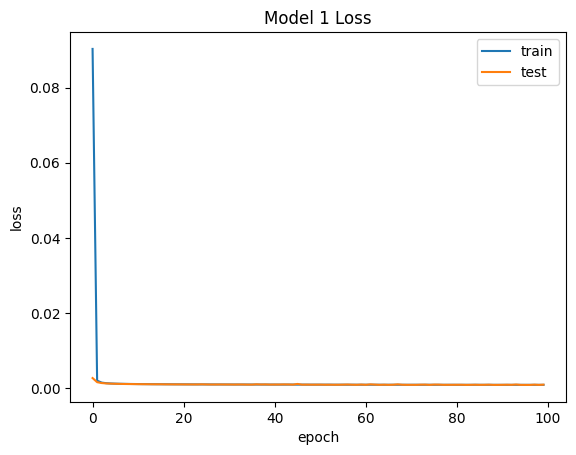

In [ ]:
plot_loss(history1)

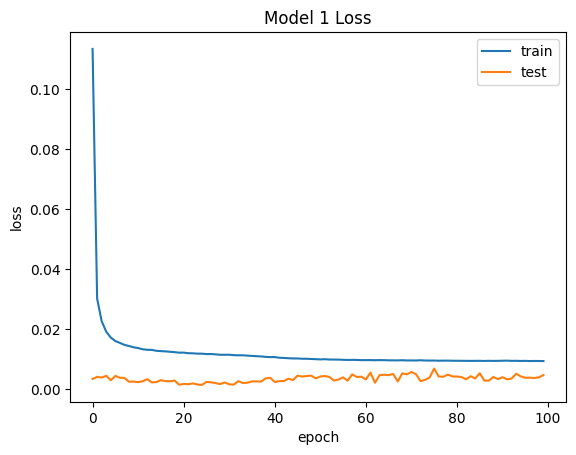

In [ ]:
plot_loss(history2)

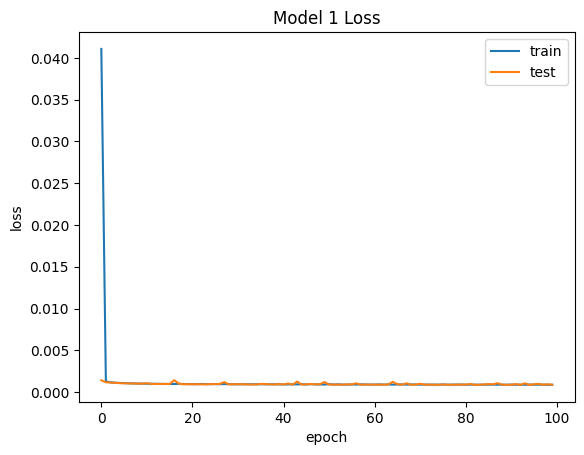

In [ ]:
plot_loss(history3)

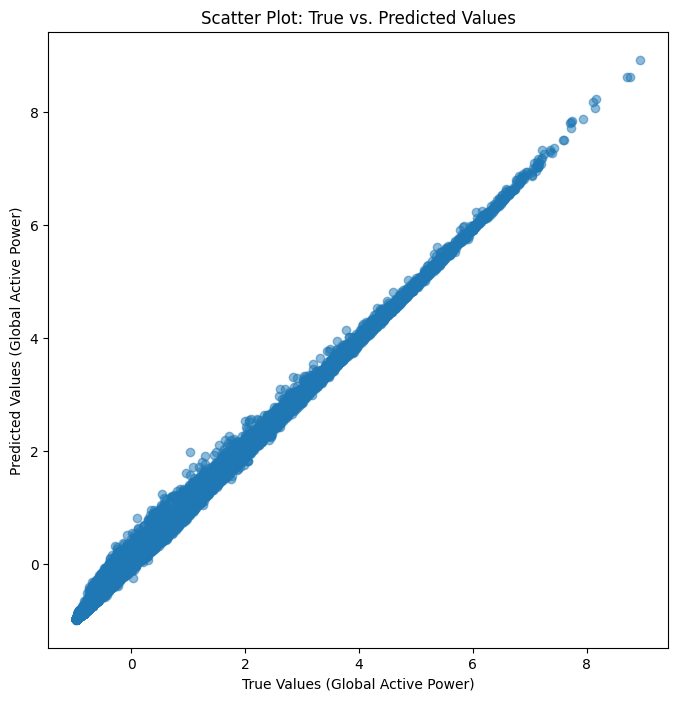

In [ ]:
scatter_plot(y_test, predictionModel1)

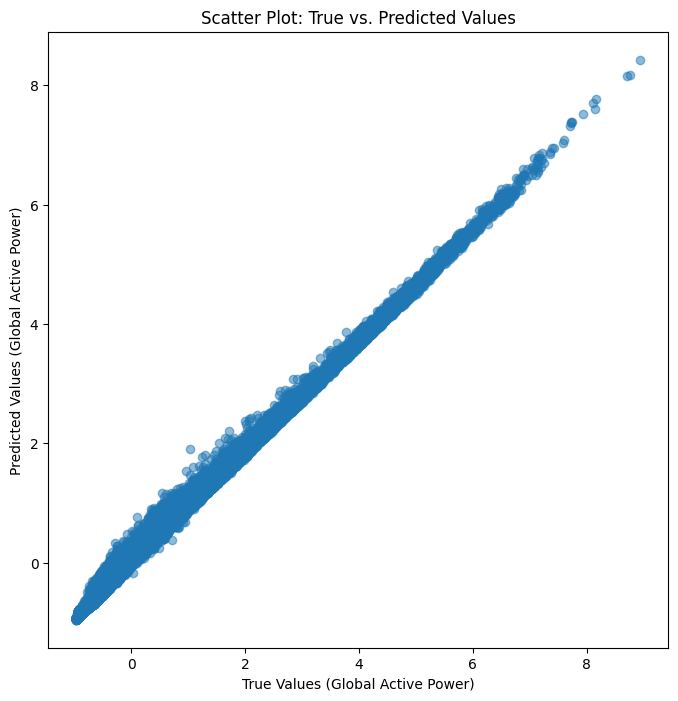

In [ ]:
scatter_plot(y_test, predictionModel2)

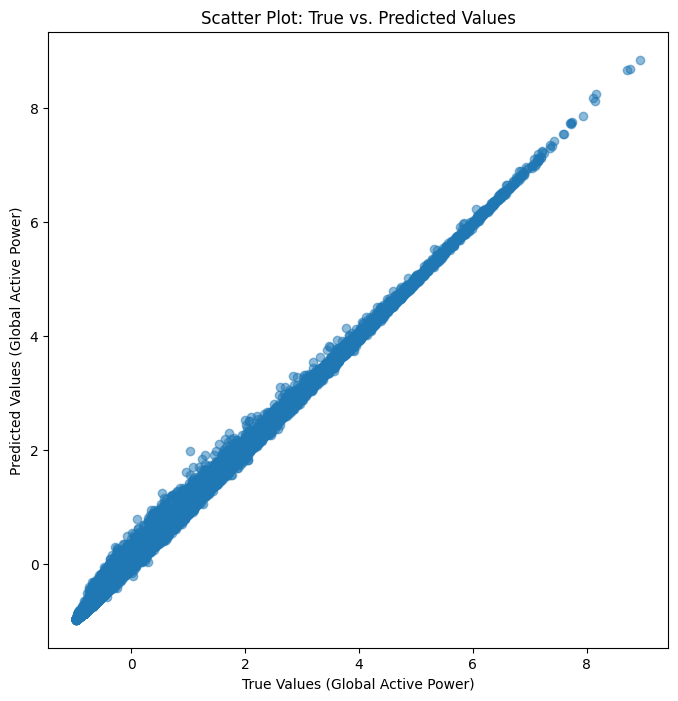

In [ ]:
scatter_plot(y_test, predictionModel3)

Menghitung mean squared error, root mean squared error, dan R-squared untuk ditampilkan pada tabel dibawah

In [ ]:
# Menghitung RMSE
mse1 = mean_squared_error(y_test, predictionModel1)
mse2 = mean_squared_error(y_test, predictionModel2)
mse3 = mean_squared_error(y_test, predictionModel3)

rmse1 = np.sqrt(mse1)
rmse2 = np.sqrt(mse2)
rmse3 = np.sqrt(mse3)

In [ ]:
# Menghitung R-squared
r2model1 = r2_score(y_test, predictionModel1)
r2model2 = r2_score(y_test, predictionModel2)
r2model3 = r2_score(y_test, predictionModel3)

In [ ]:
data = {
    "Model": ["Model 1", "Model 2", "Model 3"],
    "Mean Squared Error":[evaluatedModel1,evaluatedModel2,evaluatedModel3],
    "Root Mean Squared Error":[rmse1,rmse2,rmse3],
    "R-squared": [r2model1, r2model2, r2model3],
}
evalueted = pd.DataFrame(data)

Berikut merupakan hasil dari evaluasi dari ke 3 model yang telah dibangun

In [ ]:
evalueted

,Model,Mean Squared Error,Root Mean Squared Error,R-squared
0,Model 1,0.000949,0.030799,0.999058
1,Model 2,0.004745,0.068886,0.995287
2,Model 3,0.000881,0.029679,0.999125


#### Hasil dan Analisis
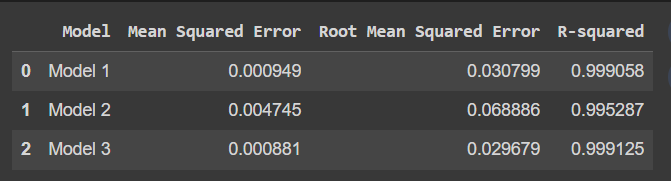

Berdasarkan hasil di atas,

Terdapat tiga model (Model 1, Model 2, dan Model 3) dengan hasil evaluasi menggunakan Mean Squared Error (MSE), Root Mean Squared Error (RMSE), dan R-squared. Berikut adalah hasil dan analisisnya:

### Hasil Evaluasi Model:

1. **Model 1:**
   - Mean Squared Error (MSE): 0.000949
   - Root Mean Squared Error (RMSE): 0.030799
   - R-squared: 0.999058

2. **Model 2:**
   - Mean Squared Error (MSE): 0.004745
   - Root Mean Squared Error (RMSE): 0.068886
   - R-squared: 0.995287

3. **Model 3:**
   - Mean Squared Error (MSE): 0.000881
   - Root Mean Squared Error (RMSE): 0.029679
   - R-squared: 0.999125

### Analisis:

1. **MSE dan RMSE:**
   - Model 3 memiliki MSE dan RMSE yang lebih rendah dibandingkan dengan Model 1 dan Model 2. Hal ini menunjukkan bahwa Model 3 memiliki tingkat kesalahan yang lebih kecil dalam memprediksi nilai target.

2. **R-squared:**
   - Model 3 juga memiliki R-squared tertinggi, yaitu 0.999125. R-squared mendekati 1 menunjukkan bahwa model tersebut sangat baik dalam menjelaskan variasi dalam data target. Model 1 juga memiliki R-squared yang tinggi, tetapi Model 3 sedikit lebih unggul.

3. **Kesimpulan:**
   - Model 3 secara keseluruhan memberikan kinerja yang lebih baik berdasarkan evaluasi MSE, RMSE, dan R-squared. Namun, pemilihan model tergantung pada konteks dan persyaratan aplikasi tertentu. Dalam beberapa kasus, model dengan performa yang tinggi dapat lebih kompleks atau memerlukan sumber daya komputasi yang lebih besar.

4. **Overfitting:**
   - Meskipun Model 1 dan Model 3 memiliki hasil yang sangat baik, perlu diperhatikan kemungkinan overfitting, terutama jika Model 1 dan Model 3 diuji pada dataset pengujian yang berbeda.



### Kesimpulan:

Berdasarkan evaluasi Model 1, Model 2, dan Model 3 menggunakan Mean Squared Error (MSE), Root Mean Squared Error (RMSE), dan R-squared, dapat diambil beberapa kesimpulan:

1. **Model Terbaik:**
   - Model 3 menunjukkan kinerja terbaik dengan MSE dan RMSE yang lebih rendah serta R-squared yang lebih tinggi dibandingkan dengan Model 1 dan Model 2.

2. **Ketelitian Prediksi:**
   - Model 3 memiliki tingkat kesalahan yang rendah, dilihat dari MSE dan RMSE yang kecil. Ini menunjukkan bahwa prediksinya cenderung lebih dekat dengan nilai sebenarnya.

3. **Kemampuan Penjelasan Variabilitas:**
   - R-squared yang tinggi pada Model 3 (0.999125) menunjukkan bahwa model tersebut sangat baik dalam menjelaskan variasi dalam data target. Model ini mampu menjelaskan sebagian besar variabilitas data.

4. **Pertimbangan Overfitting:**
   - Perlu diingat bahwa kinerja yang tinggi, terutama pada Model 1 dan Model 3, mungkin menunjukkan adanya potensi overfitting, terutama jika diuji pada dataset yang berbeda.

Dengan demikian, Model 3 dapat dianggap sebagai pilihan yang lebih baik berdasarkan hasil evaluasi yang ada.

